## Football Mod02 Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3 
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

### The SQL Table names are as follows:
- Matches	
    - Match_ID, Div, Season, Date, HomeTeam, AwayTeam, FTHG, FTAG, FTR
- Teams	
    - Season, TeamName, KaderHome, AvgAgeHome, ForeignPlayersHome, OverallMarketValueHome, AvgMarketValueHome, StadiumCapacity

- Teams_in_Matches	
    - Match_ID, Unique_Team_ID

- Unique_Teams	
    - TeamName, Unique_Team_ID

# Find The Names of All The Teams In The Dataset:

In [2]:
cur.execute("""SELECT Match_ID, HomeTeam, AwayTeam 
                FROM matches
                WHERE Season == 2011;""")
df_matches = pd.DataFrame(cur.fetchall())
df_matches.columns = [x[0] for x in cur.description]
df_matches.head()

,Match_ID,HomeTeam,AwayTeam
0,1092,Nurnberg,Bayern Munich
1,1093,Stuttgart,Bayern Munich
2,1094,Wolfsburg,Bayern Munich
3,1095,Mainz,Bayern Munich
4,1096,Freiburg,Bayern Munich


The total Number of Teams that are recorded in this dataset:

In [3]:
home_teams= list(df_matches['HomeTeam'])
away_teams= list(df_matches['AwayTeam'])
teams = sorted(list(set(home_teams + away_teams)))

In [4]:
print("The total number of teams:", len(teams))

The total number of teams: 56


In [5]:
cur.execute("""SELECT * FROM teams;""")
df_teams = pd.DataFrame(cur.fetchall())
df_teams.columns = [x[0] for x in cur.description]
df_teams.head()

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [6]:
teams_2 =sorted(list(set(df_teams['TeamName'])))

In [7]:
len(teams_2)

57

# The total number of goals scored by the team during the 2011 season

In [8]:
cur.execute("""SELECT TeamName  FROM teams
                WHERE Season == 2011;""")
df_teams_2011 = pd.DataFrame(cur.fetchall())
df_teams_2011.columns = [x[0] for x in cur.description]
df_teams_2011.head()

,TeamName
0,Bayern Munich
1,Dortmund
2,Leverkusen
3,Schalke 04
4,Werder Bremen


In [9]:
cur.execute("""SELECT HomeTeam, SUM(FTHG) AS TotalHG, SUM(FTAG) AS TotalHAG
                FROM matches
                WHERE Season == 2011
                GROUP BY HomeTeam;""")
df_Home_2011 = pd.DataFrame(cur.fetchall())
df_Home_2011.columns = [x[0] for x in cur.description]
df_Home_2011.head()

,HomeTeam,TotalHG,TotalHAG
0,Aachen,15,24
1,Arsenal,39,17
2,Aston Villa,20,25
3,Augsburg,20,19
4,Bayern Munich,49,6


In [10]:
cur.execute("""SELECT AwayTeam, SUM(FTAG) AS TotalAG, SUM(FTHG) AS TotalAAG
                FROM matches
                WHERE Season == 2011
                GROUP BY AwayTeam;""")
df_Away_2011 = pd.DataFrame(cur.fetchall())
df_Away_2011.columns = [x[0] for x in cur.description]
df_Away_2011.head()

,AwayTeam,TotalAG,TotalAAG
0,Aachen,15,23
1,Arsenal,35,32
2,Aston Villa,17,28
3,Augsburg,16,30
4,Bayern Munich,28,16


Check that the number of teams is the same. This should be correct but its good to double check.

In [11]:
teams_2011 = df_Home_2011['HomeTeam'] == df_Away_2011['AwayTeam']
teams_2011

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
51    True
52    True
53    True
54    True
55    True
dtype: bool

Make a combined table:

In [12]:
df_2011 = df_Home_2011.copy()

Goals For Team:

In [13]:
df_2011['TotalAG'] = df_Away_2011['TotalAG']

Goals Against Team:

In [14]:
df_2011['TotalAAG'] = df_Away_2011['TotalAAG']

Overall Goals & Goal Differance:

In [15]:
df_2011['TotalGFor'] = df_2011['TotalHG'] + df_2011['TotalAG']

In [16]:
df_2011['TotalGAgainst'] = df_2011['TotalHAG'] + df_2011['TotalAAG']

In [17]:
df_2011['GoalDiff'] = df_2011['TotalGFor'] - df_2011['TotalGAgainst']

In [18]:
df_2011.rename(columns={"HomeTeam": 'Team'}, inplace=True)

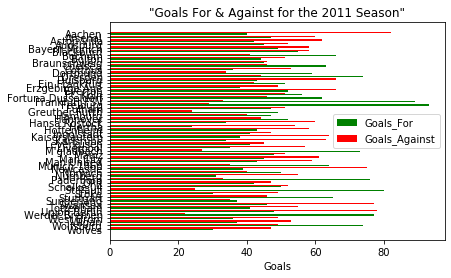

In [19]:
labels = sorted(df_2011['Team'], reverse=True)
goals_for = df_2011['TotalGFor']
goals_against = df_2011['TotalGAgainst']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, goals_for, width, label='Goals_For', color='g')
rects2 = ax.barh(x + width/2, goals_against, width, label='Goals_Against', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Goals')
ax.set_title('"Goals For & Against for the 2011 Season"')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# fig.tight_layout()
# plt.figure(figsize=([20,20]))

plt.show()

# The total number of wins the team earned during the 2011 season

For this question I want to create a table with dummy columns. Three Columns, HomeWin, AwayWin & Draw. There is a case for removing the Draw columns as if there is neither a HomeWin (=0) or an AwayWin (=0), then it must have been a draw. 

In [22]:
cur.execute("""SELECT HomeTeam, COUNT(FTR) AS HomeWins
                FROM matches
                WHERE Season == 2011 
                AND FTR == 'H'
                GROUP BY HomeTeam;""")
df_RH_2011 = pd.DataFrame(cur.fetchall())
df_RH_2011.columns = [x[0] for x in cur.description]
df_RH_2011.head()

,HomeTeam,HomeWins
0,Aachen,4
1,Arsenal,12
2,Aston Villa,4
3,Augsburg,6
4,Bayern Munich,14


In [23]:
cur.execute("""SELECT AwayTeam, COUNT(FTR) AS AwayWins
                FROM matches
                WHERE Season == 2011 
                AND FTR == 'A'
                GROUP BY AwayTeam;""")
df_RA_2011 = pd.DataFrame(cur.fetchall())
df_RA_2011.columns = [x[0] for x in cur.description]
df_RA_2011.head()

,AwayTeam,AwayWins
0,Aachen,2
1,Arsenal,9
2,Aston Villa,3
3,Augsburg,2
4,Bayern Munich,9


In [24]:
df_results_2011 = df_RH_2011.copy()
df_results_2011['AwayWins'] = df_RA_2011['AwayWins']
df_results_2011['WinTotal'] = df_results_2011['HomeWins'] + df_results_2011['AwayWins']
df_results_2011

,HomeTeam,HomeWins,AwayWins,WinTotal
0,Aachen,4,2,6
1,Arsenal,12,9,21
2,Aston Villa,4,3,7
3,Augsburg,6,2,8
4,Bayern Munich,14,9,23
5,Blackburn,6,2,8
6,Bochum,7,3,10
7,Bolton,4,6,10
8,Braunschweig,6,4,10
9,Chelsea,12,6,18


# A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly by assigning it to a variable)

In [147]:
cur.execute("""SELECT HomeTeam, AwayTeam, FTR
                FROM matches
                WHERE Season == 2011
                ;""")
df_result_2011 = pd.DataFrame(cur.fetchall())
df_result_2011.columns = [x[0] for x in cur.description]

Create the dummy columns from this:

In [148]:
result_dummies = pd.get_dummies(df_result_2011['FTR'])
df_result_2011 = pd.concat([df_result_2011,result_dummies], axis=1)
df_result_2011.drop(columns=['FTR'], inplace=True)

Create the blank Table of just the teams for 2011:

In [149]:
# teams_dict = dict(teams, "H":0, D=0, A=0)
blanks_r = [0]*(len(teams))
df_2011_HDA = pd.DataFrame(columns={'Team_2011':teams,
                                    'HomeWins':blanks_r,
                                    'HomeDraws':blanks_r, 
                                    'HomeLoss':blanks_r,
                                    'AwayWins':blanks_r,
                                    'AwayDraws':blanks_r, 
                                    'AwayLoss':blanks_r})
df_2011_HDA['Team_2011']=teams
df_2011_HDA['HomeWins']=blanks_r
df_2011_HDA['HomeDraws']=blanks_r
df_2011_HDA['HomeLoss']=blanks_r
df_2011_HDA['AwayWins']=blanks_r
df_2011_HDA['AwayDraws']=blanks_r
df_2011_HDA['AwayLoss']=blanks_r

Create functions that for each team 

In [150]:
def home_results_counter(team):
    df_Hteam = df_result_2011.loc[df_result_2011.HomeTeam == team]
    win_Hsum = df_Hteam['H'].sum()
    draw_Hsum = df_Hteam['D'].sum()
    loss_Hsum = df_Hteam['A'].sum()
    
    return [win_Hsum, draw_Hsum, loss_Hsum]

In [151]:
def away_results_counter(team):
    df_Ateam = df_result_2011.loc[df_result_2011.AwayTeam == team]
    win_Asum = df_Ateam['A'].sum()
    draw_Asum = df_Ateam['D'].sum()
    loss_Asum = df_Ateam['H'].sum()
    
    return [win_Asum, draw_Asum, loss_Asum]

Check the functions work:

In [152]:
print("Aachen Result Home:",home_results_counter('Aachen'), "\n\nAachen Result Away:", away_results_counter('Aachen'))

Aachen Result Home: [4, 6, 7] 

Aachen Result Away: [2, 7, 8]


Create function to do it for each team in the Table of just the teams for 2011:

In [153]:
def results_to_table(teams):
    i = 0
    for team in teams:
        r_home = home_results_counter(team)
        df_2011_HDA.HomeWins[i] = r_home[0]
        df_2011_HDA.HomeDraws[i] = r_home[1]
        df_2011_HDA.HomeLoss[i] = r_home[2]
        
        r_away = away_results_counter(team)
        df_2011_HDA['AwayWins'][i] = r_away[0]
        df_2011_HDA['AwayDraws'][i] =r_away[1]
        df_2011_HDA['AwayLoss'][i] =r_away[2]
        
        i += 1

In [154]:
results_to_table(df_2011_HDA.Team_2011)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

In [155]:
df_2011_HDA

,Team_2011,HomeWins,HomeDraws,HomeLoss,AwayWins,AwayDraws,AwayLoss
0,Aachen,4,6,7,2,7,8
1,Arsenal,12,4,3,9,3,7
2,Aston Villa,4,7,8,3,10,6
3,Augsburg,6,7,4,2,7,8
4,Bayern Munich,14,1,2,9,3,5
5,Blackburn,6,1,12,2,6,11
6,Bochum,7,3,7,3,4,10
7,Bolton,4,4,11,6,2,11
8,Braunschweig,6,8,3,4,7,6
9,Chelsea,12,3,4,6,7,6


Add Total's & Games Played to table:

In [156]:
df_2011_HDA['TotalWins'] = df_2011_HDA['HomeWins'] + df_2011_HDA['AwayWins']
df_2011_HDA['TotalDraws'] = df_2011_HDA['HomeDraws'] + df_2011_HDA['AwayDraws']
df_2011_HDA['TotalLoss'] = df_2011_HDA['HomeLoss'] + df_2011_HDA['AwayLoss']
df_2011_HDA['GamesPlayed'] = (df_2011_HDA['HomeWins'] + df_2011_HDA['AwayWins']
                              + df_2011_HDA['HomeDraws'] + df_2011_HDA['AwayDraws']
                              +df_2011_HDA['HomeLoss'] + df_2011_HDA['AwayLoss'])
df_2011_HDA

,Team_2011,HomeWins,HomeDraws,HomeLoss,AwayWins,AwayDraws,AwayLoss,TotalWins,TotalDraws,TotalLoss,GamesPlayed
0,Aachen,4,6,7,2,7,8,6,13,15,34
1,Arsenal,12,4,3,9,3,7,21,7,10,38
2,Aston Villa,4,7,8,3,10,6,7,17,14,38
3,Augsburg,6,7,4,2,7,8,8,14,12,34
4,Bayern Munich,14,1,2,9,3,5,23,4,7,34
5,Blackburn,6,1,12,2,6,11,8,7,23,38
6,Bochum,7,3,7,3,4,10,10,7,17,34
7,Bolton,4,4,11,6,2,11,10,6,22,38
8,Braunschweig,6,8,3,4,7,6,10,15,9,34
9,Chelsea,12,3,4,6,7,6,18,10,10,38


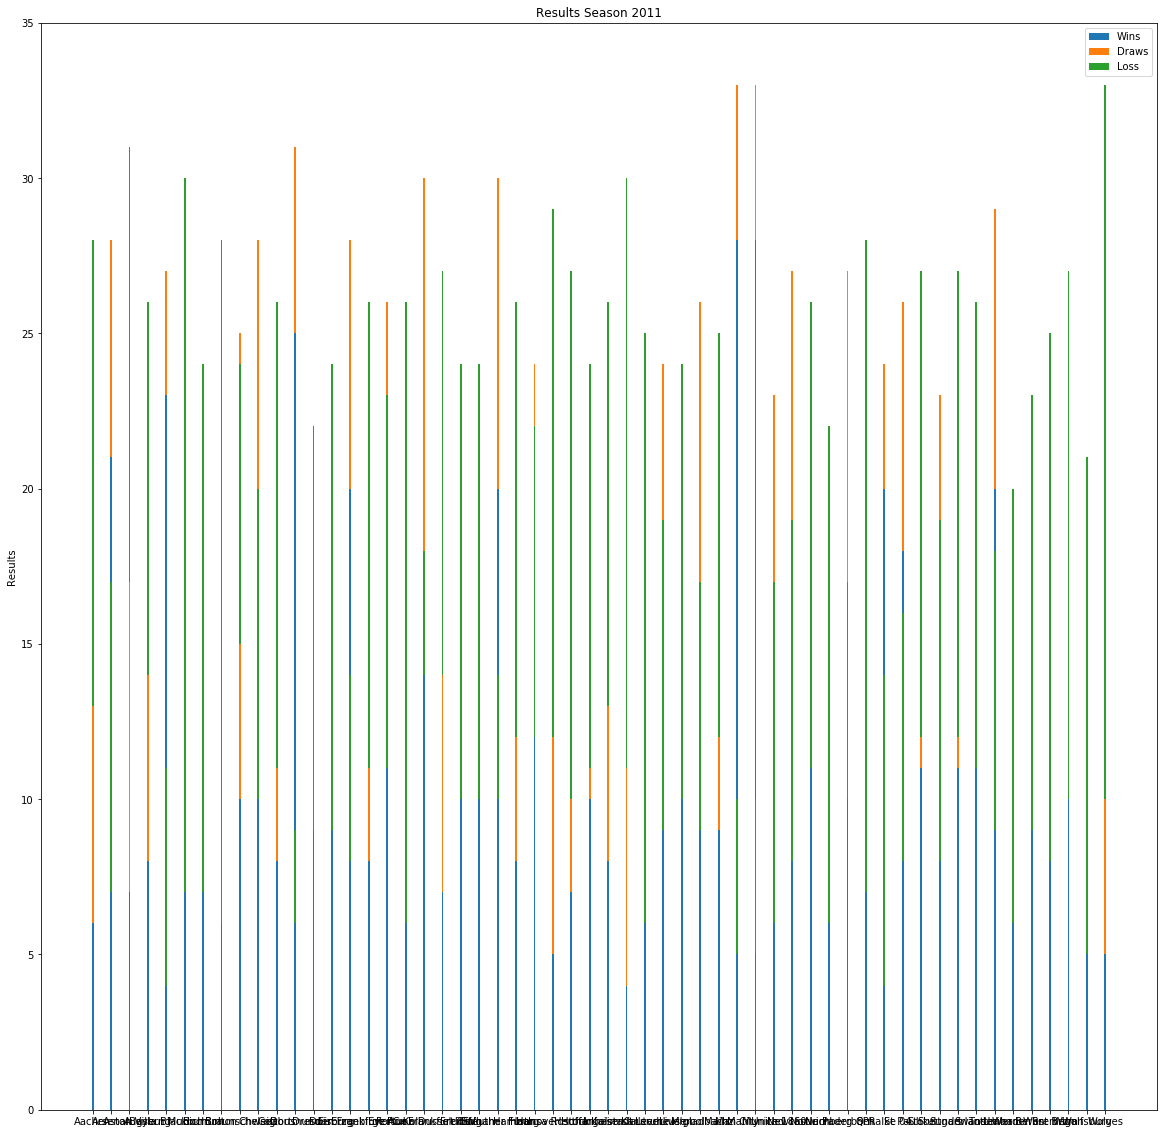

In [166]:
N = len(df_2011_HDA['Team_2011'])
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N)    # the x locations for the groups
width = 0.1       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=([20,20]))
p1 = plt.bar(ind, df_2011_HDA['TotalWins'], width)
p2 = plt.bar(ind, df_2011_HDA['TotalDraws'], width, bottom= df_2011_HDA['TotalWins'])
p3 = plt.bar(ind, df_2011_HDA['TotalLoss'], width, bottom= df_2011_HDA['TotalDraws'])

plt.ylabel('Results')
plt.title('Results Season 2011')
plt.xticks(ind, df_2011_HDA['Team_2011'])
plt.yticks(np.arange(0, 40, 5))
plt.legend((p1[0], p2[0], p3[0]), ('Wins', 'Draws', 'Loss'))